In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Descriptive Statistics

### 1. Leximi i te dhenave ose keti DataFrame

In [2]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

In [3]:
ucl.head()

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,32,8,15,0,0,0,2,994,13,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1


#### 2. **Mean** - metoda mean() – Ky osht mesatarja e numrave, dmth i mbledhim krejt vlerat edhe i ndajmë me sa copa jone.


 ##### 2.1  Mesataren e DistanceCovered(km) per lojtaret shka kan luajtur ne Serie A 🇮🇹 :

In [4]:
serie_a_players_mean = ucl[ucl['Competitions'] == 'Serie A']

In [5]:
average_distance = serie_a_players_mean['DistanceCovered(km)'].mean()
print(f"Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne Serie A eshte: {average_distance:.2f} km")

Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne Serie A eshte: 72.34 km


##### 2.2 top 10 lojtaret me distancë me të madhe te mbuluar mesatarisht Bazuar ne Skuadrat Serie A(Italy) ne Champions League

In [6]:
distance_per_player_serie_a = serie_a_players_mean.groupby(['Player', 'Team'])['DistanceCovered(km)'].mean().sort_values(ascending=False)

print(distance_per_player_serie_a.head(15))

Player             Team       
Marten de Roon     Atalanta BC    112.0
Tijjani Reijnders  Milan          111.3
Ederson            Atalanta BC    100.2
Theo Hernandez     Milan           99.8
Youssouf Fofana    Milan           98.2
Nicolo Barella     Inter           97.4
Zappacosta         Atalanta BC     90.1
Calhanoglu         Inter           87.6
Pulisic            Milan           87.3
Bastoni            Inter           85.5
Rafael Leao        Milan           84.9
Charles Ketelaere  Atalanta BC     84.5
Mkhitaryan         Inter           81.8
Thuram             Inter           81.6
Federico Gatti     Juventus        81.5
Name: DistanceCovered(km), dtype: float64


##### 2.3 Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne Kompeticion La Liga  :

In [7]:
laliga_players_mean = ucl[ucl['Competitions'] == 'La Liga']
average_distance_laliga = laliga_players_mean['DistanceCovered(km)'].mean()

In [8]:
print(f"Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne La Liga eshte: {average_distance_laliga:.2f} km")

Mesatarja e DistanceCovered(km) për lojtarët ne Ucl Bazuar ne La Liga eshte: 81.85 km


In [9]:
distance_per_player_laliga = laliga_players_mean.groupby(['Player', 'Team'])['DistanceCovered(km)'].mean().sort_values(ascending=False)

In [10]:
print(distance_per_player_laliga.head(15))

Player          Team           
Pedri           Barcelona          141.1
Valverde        Real Madrid        140.0
Raphinha        Barcelona          126.8
Vinicius Jr     Real Madrid        118.9
Kounde          Barcelona          113.2
Kylian Mbappe   Real Madrid        109.9
Rodrygo         Real Madrid        102.9
Inigo Martinez  Barcelona          101.7
Yamal           Barcelona          101.3
Tchouameni      Real Madrid         97.0
Julian Alvarez  Atletico Madrid     96.5
De Paul         Atletico Madrid     93.4
Lewandowski     Barcelona           92.5
Griezmann       Atletico Madrid     89.6
Balde           Barcelona           86.2
Name: DistanceCovered(km), dtype: float64


In [11]:
mesatarja_age = ucl['Value10^6'].mean()

mesatarja_age

np.float64(39.68452380952381)

In [12]:
print("Mesatarja per DataFrame Tone:")
ucl.mean(numeric_only=True)

Mesatarja per DataFrame Tone:


PlayerID               105.500000
Age                     26.780952
Value10^6               39.684524
Jersey_Num              17.700000
Rating                   7.232667
Goals                    1.819048
Assists                  1.352381
TopSpeed(km/h)          32.495238
DistanceCovered(km)     85.780952
Total_attempts          12.661905
Dribbles                13.933333
Passes_completed       364.223810
Chances_Created         10.123810
Balls_recovered         29.719048
Tackles_Won              4.590476
Tackles_Lost             6.100000
Saves                    3.228571
Goals_Conceded           1.266667
Clean_Sheets             0.276190
MOTM_Awards              0.619048
Minutes_played         798.100000
Match_played            10.380952
DNP                      1.619048
dtype: float64

#### 3. **Median** - metoda median() – Ky na jep numrin e mesEm pasi i renditim numrat. Nese ka numra qift, marrim mesataren e dy te  mesmeve.


In [13]:
median_value = ucl['Value10^6'].median()

print(f"Median Value of Player: {median_value}")

Median Value of Player: 30.0


#### 4. **Mode** -  Metoda `mode()` per te dhenat numerike tregon se numri 25 del ma shpesh se krejt tjert dmth Numri ma i shpeshte per Value^6 eshte 25. Me nje Fjale kallxon qat numrin ma te shpeshin



In [14]:
mode_class = ucl['Value10^6'].mode().values[0]
print(f"Mode Class: {mode_class}")

Mode Class: 25.0


#### 5. Masat e Shperndarjes **(Measures of Dispersion)**
##### Llogaritni variancen dhe devijimin standard pEr variablat sasiorë si mosha(Age) dhe Goals etj.

In [15]:
age_variance = ucl['Age'].var

print(age_variance)

<bound method Series.var of 0      27
1      28
2      36
3      28
4      33
       ..
205    22
206    35
207    27
208    26
209    26
Name: Age, Length: 210, dtype: int64>


In [16]:
goals_std = ucl['Goals'].std()

print(f'Devijimi standard i Golave: {goals_std}')


Devijimi standard i Golave: 2.430984018696335


In [17]:
dribbles_std = ucl['Dribbles'].std()
print(f'Devijimi standard i Dribbleve: {round(dribbles_std, 3)}')

Devijimi standard i Dribbleve: 16.274


In [18]:
ucl.select_dtypes(include='object').describe()

,Player,Position,Nationality,Team,Competitions,Phase,Phase_Tier
count,210,210,210,210,210,210,210
unique,210,4,44,31,12,6,6
top,Theo Hernandez,Midfielder,France,Inter,Serie A,Round16,C
freq,1,66,24,13,38,58,58


#### 6. Shperndarja e frekuencave(Frequency Distribution)
##### Ketu do krijojme histogram për të vizualizuar shperndarjen e frekuencave sasiore si mosha(Age) dhe Goals  Assists etj.

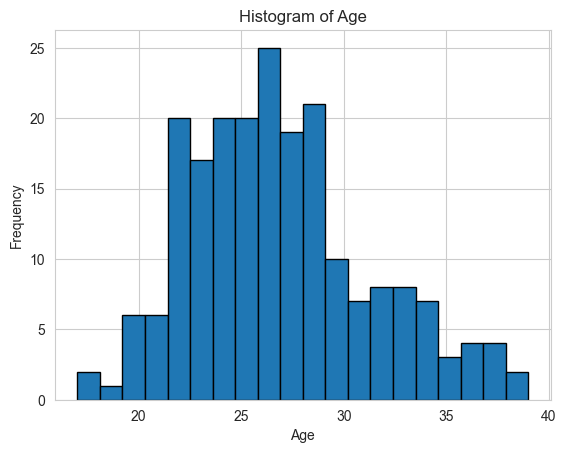

In [19]:
plt.hist(ucl['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [20]:
fig = px.histogram(ucl, x='Age', nbins=30, title="Histogram of Age",color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title="Age", yaxis_title="Frequency")
fig.show()

In [21]:
barcelonateam = ucl[ucl['Team'] == 'Barcelona']
barcelonateam['Goals'].sum()

np.int64(37)

#### 7.Sa Gola Jan Shenuar Gjate Gjithsej Champions League 2025, Asistave dhe Saves

In [22]:
all_goals = ucl.sum()['Goals']
all_assists = ucl.sum()['Assists']
all_saves = ucl.sum()['Saves']

print(f'All goals Champions League: {all_goals}')
print(f'All assists Champions League: {all_assists}')
print(f'All saves Champions League: {all_saves}')

All goals Champions League: 382
All assists Champions League: 284
All saves Champions League: 678


#### 8.Sa gola mesatarisht bëjnë lojtarët sipas pozicionit?

In [23]:
ucl.groupby('Position')['Goals'].mean().sort_values(ascending=False)

Position
Forward       3.968750
Midfielder    1.287879
Defender      0.716667
Goalkeeper    0.000000
Name: Goals, dtype: float64

#### 9.Top Scoring Teams🛡️

In [24]:
topscoring_teams = (ucl.groupby('Team')['Goals'].sum().sort_values(ascending=False).reset_index().head(10))
topscoring_teams

,Team,Goals
0,Barcelona,37
1,Paris SG,31
2,BVB Dortmund,28
3,Bayern Munich,27
4,Real Madrid,26
5,Arsenal FC,24
6,Inter,22
7,PSV Eindhoven,18
8,Benfica,18
9,Atletico Madrid,17


In [25]:
fig = px.bar(
    topscoring_teams.sort_values(by='Goals',ascending=True ),  # e rendisim për grafik horizontal
    x='Goals',
    y='Team',
    title='Top Scoring Teams Champions League 2025 ⭐🏆',
    text='Goals',
)
fig.update_traces(marker_color='steelblue', textposition='inside')

fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Goals',
    yaxis_title='Team',
    showlegend=False
)

fig.show()

#### 10. Goal+Assist = Total Contributions

In [26]:
ucl['GoalsContributions'] = ucl['Goals'] + ucl['Assists']

top_contrib_teams = (
    ucl.groupby('Team')['GoalsContributions']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_contrib_teams

,Team,GoalsContributions
0,Barcelona,68
1,Paris SG,62
2,BVB Dortmund,45
3,Real Madrid,44
4,Bayern Munich,44
5,Arsenal FC,39
6,Inter,39
7,Atalanta BC,31
8,Atletico Madrid,31
9,PSV Eindhoven,30


In [27]:
top_player_barcelona = barcelonateam.groupby('Player')[['Age','Goals']].sum().sort_values(by='Goals', ascending=False)
top_player_barcelona

,Age,Goals
Player,,
Raphinha,28,13
Lewandowski,36,11
Yamal,17,5
Ferran Torres,25,3
Inigo Martinez,33,2
Dani Olmo,27,2
Fermin Lopez,22,1
Casado,21,0
Balde,21,0


In [28]:
fig = px.histogram(ucl, x='Goals', y='Team', nbins=30, title="Teams that have scored the most goals in the Champions League 2025",color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title="Goals", yaxis_title="Teams")
fig.show()

In [29]:
fig = px.bar(ucl, x='Team', y='Goals', text='Player', title="Teams that have scored the most goals in the Champions League 2025",
             color='Goals', color_continuous_scale='Blues')

fig.update_layout(xaxis_title="Team", yaxis_title="Goals Scored")
fig.show()

#### 11. Tabelat e numrimeve(Frequency Table)

In [30]:
teams_players = ucl[['Team']].value_counts()

teams_players

Team            
Inter               13
Barcelona           12
Arsenal FC          12
Paris SG            12
Real Madrid         11
BVB Dortmund        11
Bayern Munich       10
Liverpool FC        10
PSV Eindhoven       10
Benfica              9
Atalanta BC          9
Atletico Madrid      8
Aston Villa          8
Monaco               7
Bayer Leverkusen     7
Manchester City      7
Milan                7
Sporting CP          6
Lille                6
Celtic               6
Club Brugge          5
Juventus             5
Feyenoord            4
Bologna              4
Shakhtar Donetsk     3
VfB Stuttgart        2
Brest                2
Dinamo Zagreb        1
Leipzig              1
Girona               1
Sturm Graz           1
Name: count, dtype: int64

In [31]:
unique_teams_ucl = pd.Series(ucl['Team'].unique(),name='Teams')
unique_teams_ucl


0                Milan
1                Inter
2            Barcelona
3         Liverpool FC
4          Real Madrid
5           Arsenal FC
6          Club Brugge
7              Benfica
8               Celtic
9      Atletico Madrid
10            Paris SG
11       PSV Eindhoven
12               Brest
13               Lille
14    Bayer Leverkusen
15     Manchester City
16        BVB Dortmund
17            Juventus
18         Aston Villa
19         Atalanta BC
20             Leipzig
21          Sturm Graz
22              Monaco
23       Bayern Munich
24         Sporting CP
25           Feyenoord
26             Bologna
27    Shakhtar Donetsk
28       VfB Stuttgart
29       Dinamo Zagreb
30              Girona
Name: Teams, dtype: object

In [32]:
# Filtrimi i lojtarëve mbi moshen 30
players_aged = ucl[(ucl['Age'] > 30) & (ucl['Position'] != 'Goalkeeper')]

players_aged

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP,GoalsContributions
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,4,1,0,0,0,2,985,13,1,11
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,3,3,0,0,0,0,840,9,1,1
8,9,Hans Vanaken,Midfielder,32,Belgium,Club Brugge,Pro League,Round16,C,7.0,...,4,9,0,0,0,1,1080,12,0,2
9,10,Otamendi,Defender,37,Argentina,Benfica,Liga Portugal,Round16,C,1.0,...,17,14,0,0,0,0,1080,12,0,1
36,37,Calhanoglu,Midfielder,31,Turkey,Inter,Serie A,Final,S,50.0,...,8,8,0,0,0,1,835,12,3,6
46,47,Taremi,Forward,32,Iran,Inter,Serie A,Final,S,5.0,...,7,4,0,0,0,1,715,12,3,5
47,48,Griezmann,Forward,34,France,Atletico Madrid,La Liga,Round16,C,22.0,...,5,3,0,0,0,3,732,10,0,9
62,63,Di Maria,Forward,37,Argentina,Benfica,Liga Portugal,Round16,C,3.0,...,3,3,0,0,0,2,547,9,3,3
66,67,Stefan de Vrij,Defender,33,Netherlands,Inter,Serie A,Final,S,7.0,...,4,2,0,0,0,0,688,9,6,0
70,71,Modric,Midfielder,39,Croatia,Real Madrid,La Liga,Quarter_finals,B,5.0,...,5,12,0,0,0,0,647,14,0,3


In [33]:
players_aged_sorted = players_aged[['Player','Age','Team','Position','Goals','Minutes_played','Match_played']].sort_values(by='Match_played', ascending=False)

players_aged_sorted.head(20)

,Player,Age,Team,Position,Goals,Minutes_played,Match_played
70,Modric,39,Real Madrid,Midfielder,0,647,14
2,Lewandowski,36,Barcelona,Forward,11,985,13
72,Pascal Gross,33,BVB Dortmund,Midfielder,1,918,13
94,Mkhitaryan,36,Inter,Midfielder,0,856,13
144,Harry Kane,31,Bayern Munich,Forward,11,1120,13
78,Emre Can,31,BVB Dortmund,Midfielder,2,940,12
9,Otamendi,37,Benfica,Defender,1,1080,12
36,Calhanoglu,31,Inter,Midfielder,4,835,12
8,Hans Vanaken,32,Club Brugge,Midfielder,1,1080,12
169,Partey,31,Arsenal FC,Midfielder,0,899,12


In [34]:
fig = px.bar(
    players_aged_sorted.head(20),
    x='Player',
    y='Match_played',
    color='Goals',
    hover_data=['Age', 'Team', 'Position'],
    title='Players over 30 (not goalkeepers) with the most matches played and their goals',
    text='Match_played'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [35]:
goals_per_player = ucl.groupby(['Player', 'Position','Team'])['Goals'].sum().reset_index()
goals_per_player = goals_per_player.sort_values(by='Goals', ascending=False).head(20)
fig2 = px.pie(goals_per_player,
              values='Goals',
              names='Player',
              title='Top 20 lojtaret me me se shumti gola ne Champions League 2025',
              hover_data=['Position'])
fig2.update_traces(textposition='inside', textinfo='label+value', textfont_size=16)
fig2.show()

#### 12. Top Scorers ne Champions League 2025

In [36]:
# top scorer
top_scorer = ucl.groupby(['Player', 'Position','Team'])['Goals'].sum().sort_values(ascending=False).head(3).reset_index()

top_scorer

,Player,Position,Team,Goals
0,Guirassy,Forward,BVB Dortmund,13
1,Raphinha,Forward,Barcelona,13
2,Lewandowski,Forward,Barcelona,11


In [37]:
ucl['Competitions'] = ucl['Competitions'].str.strip()

In [38]:
teams_per_comp = ucl.groupby(['Competitions'])['Team'].nunique().sort_values(ascending=False)

print(teams_per_comp)

Competitions
Bundesliga        5
Serie A           5
Ligue 1           4
La Liga           4
Premier League    4
Eredivisie        2
Liga Portugal     2
ABundesliga       1
Premier Liga      1
Premiership       1
Pro League        1
SuperSport HNL    1
Name: Team, dtype: int64


In [39]:
teams_ucl = teams_per_comp.reset_index()
teams_ucl.columns = ['Competitions', 'Num_Teams']

fig = px.bar(teams_ucl, x='Competitions', y='Num_Teams',
             title='Number of teams🛡️ in the Champions League⚽🏆 by Competition',
             color='Num_Teams', text='Num_Teams')
fig.show()

In [40]:
position_counts = ucl['Position'].value_counts()

fig = px.bar(position_counts, title="Moda e Pozicioneve te Lojtareve")
fig.show()

In [67]:
played = ucl[ucl['Minutes_played'] > 0]

In [68]:
valid_competitions = played.groupby('Competitions')['Team'].transform('nunique') >= 3
filtered = played[valid_competitions]

filtered

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP,GoalsContributions,Distance_per_match
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,5,0,0,0,0,861,10,0,0,9.980000
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,15,0,0,0,2,994,13,2,2,7.492308
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,1,0,0,0,2,985,13,1,11,7.115385
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,7,0,0,0,3,1225,14,0,22,9.057143
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,3,0,0,0,0,840,9,1,1,9.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,Kenny Lala,Defender,33,France,Brest,Ligue 1,Knockout_phase,D,2.0,...,1,0,0,0,0,720,8,2,0,11.025000
206,207,Cabella,Midfielder,35,France,Lille,Ligue 1,Round16,C,3.0,...,4,0,0,0,0,388,7,3,2,6.128571
207,208,Locatelli,Midfielder,27,Italy,Juventus,Serie A,Knockout_phase,D,35.0,...,17,0,0,0,0,673,9,1,0,8.700000
208,209,Palacios,Midfielder,26,Argentina,Bayer Leverkusen,Bundesliga,Round16,C,40.0,...,13,0,0,0,0,666,10,0,0,8.610000


In [69]:
avg_distance = filtered.groupby('Competitions')['DistanceCovered(km)'].mean().reset_index()

avg_distance

,Competitions,DistanceCovered(km)
0,Bundesliga,90.983871
1,La Liga,81.846875
2,Ligue 1,100.281481
3,Premier League,83.632432
4,Serie A,72.344737


In [44]:
avg_distance = avg_distance.sort_values(by='DistanceCovered(km)', ascending=False)
avg_distance['DistanceCovered(km)'] = avg_distance['DistanceCovered(km)'].round(1)

In [45]:
fig = px.bar(
    avg_distance,
    x='Competitions',
    y='DistanceCovered(km)',
    title='Average distance per Competition Champions League⚽🏆 2025 Season',
    text='DistanceCovered(km)',
    color='DistanceCovered(km)',
    color_continuous_scale='Blues'
)
fig.update_traces(texttemplate='%{text} km', textposition='inside')
fig.show()

#### Defensive Contribution: Tackles and Ball Recoveries

In [46]:
top_defenders = (
    ucl[['Player','Position','Balls_recovered', 'Tackles_Won']]
    .sort_values(by='Balls_recovered', ascending=False)
    .head(20)
)

top_defenders


,Player,Position,Balls_recovered,Tackles_Won
139,Pacho,Defender,124,5
161,Marquinhos,Defender,109,10
129,Nuno Mendes,Defender,87,23
132,Minjae Kim,Defender,87,7
175,Joao Neves,Midfielder,87,19
79,Alexsandro Ribeiro,Defender,86,2
9,Otamendi,Defender,85,17
85,Upamecano,Defender,82,9
99,Schlotterbeck,Defender,76,19
12,Hakimi,Defender,74,11


In [47]:
top_defenders['PlayerTag'] = top_defenders['Player'] + " (" + top_defenders['Position'] + ")"

top_defenders

,Player,Position,Balls_recovered,Tackles_Won,PlayerTag
139,Pacho,Defender,124,5,Pacho (Defender)
161,Marquinhos,Defender,109,10,Marquinhos (Defender)
129,Nuno Mendes,Defender,87,23,Nuno Mendes (Defender)
132,Minjae Kim,Defender,87,7,Minjae Kim (Defender)
175,Joao Neves,Midfielder,87,19,Joao Neves (Midfielder)
79,Alexsandro Ribeiro,Defender,86,2,Alexsandro Ribeiro (Defender)
9,Otamendi,Defender,85,17,Otamendi (Defender)
85,Upamecano,Defender,82,9,Upamecano (Defender)
99,Schlotterbeck,Defender,76,19,Schlotterbeck (Defender)
12,Hakimi,Defender,74,11,Hakimi (Defender)


In [48]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=top_defenders['PlayerTag'],
    x=top_defenders['Balls_recovered'],
    name='Balls Recovered',
    orientation='h',
    marker_color='lightblue',
    text=top_defenders['Balls_recovered'],
    textposition='inside'
))

fig.add_trace(go.Bar(
    y=top_defenders['PlayerTag'],
    x=top_defenders['Tackles_Won'],
    name='Tackles Won',
    orientation='h',
    marker_color='steelblue',
    text=top_defenders['Tackles_Won'],
    textposition='inside'
))

fig.update_layout(
    title='Most Tackles and Ball Recovers in Champions League 2025',
    xaxis_title='Count',
    yaxis_title='Players ',
    barmode='overlay',
    plot_bgcolor='white',
    bargap=0.2,
    height=700
)

fig.show()


In [49]:
ucl['Distance_per_match'] = ucl['DistanceCovered(km)'] / ucl['Match_played']

In [50]:
position_stats = (
    ucl.groupby('Position')[['Distance_per_match', 'TopSpeed(km/h)']]
    .mean()
    .round(2)
    .sort_values(by='Distance_per_match', ascending=False)
    .reset_index()
)

position_stats

,Position,Distance_per_match,TopSpeed(km/h)
0,Midfielder,9.39,32.45
1,Defender,8.56,33.36
2,Forward,7.94,33.56
3,Goalkeeper,4.96,26.64


####  top 10 players in Champions League 2025 with the most goals and assists

In [51]:
ucl['GoalsContributions'] = ucl['Goals'] + ucl['Assists']

In [52]:
# Group by player name and calculate the total goals scored and assists by players
player_goalscontributions = ucl.groupby('Player')['GoalsContributions'].sum().sort_values(ascending=False)

In [53]:
best_player_ucl = player_goalscontributions.idxmax()

In [54]:
best_player_ucl

'Raphinha'

In [55]:
# Display the goal count for top 10 players
top_10_players = player_goalscontributions.head(15)
top_10_players

Player
Raphinha             22
Guirassy             17
Dembele              14
Harry Kane           13
Lewandowski          11
Vinicius Jr          11
Pavlidis             10
Desire Doue          10
Griezmann             9
Hakimi                9
Charles Ketelaere     9
Kylian Mbappe         9
Jonathan David        9
Lautaro Martinez      9
Julian Alvarez        8
Name: GoalsContributions, dtype: int64

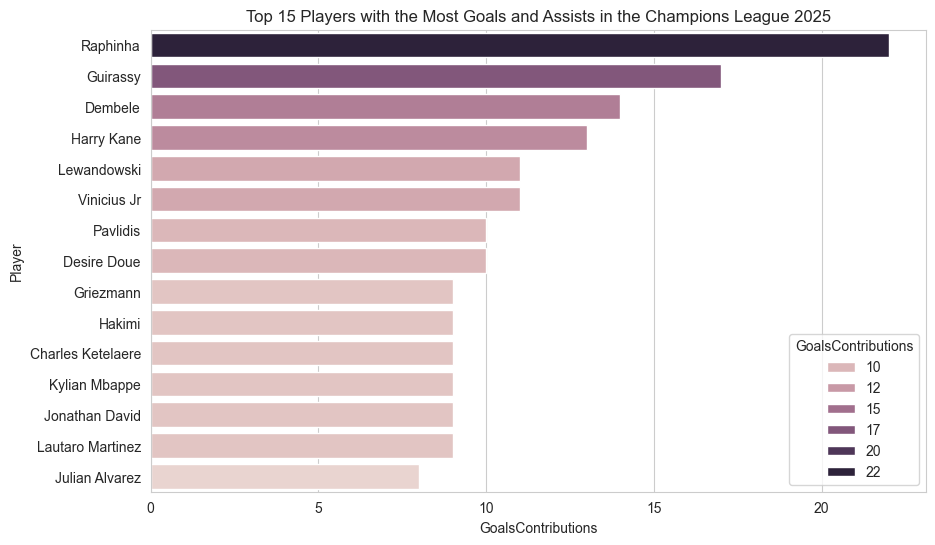

In [56]:
# Create a bar chart for the top 10 players
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_players, y=top_10_players.index,hue=top_10_players)
plt.xlabel('GoalsContributions')
plt.ylabel('Player')
plt.title('Top 15 Players with the Most Goals and Assists in the Champions League 2025')
plt.show()

In [57]:
#grouping teams together
topscoring_teams = ucl.groupby('Team')['Goals'].sum().sort_values(ascending=False).reset_index().rename(columns={'Goals':'Total Goals'})


#sorting by goals scored
topscoring_teams.sort_values(by='Total Goals',ascending=False,inplace=True)

In [58]:
topscoring_teams.head(5)

,Team,Total Goals
0,Barcelona,37
1,Paris SG,31
2,BVB Dortmund,28
3,Bayern Munich,27
4,Real Madrid,26


### Minutes played by Age in Champions League 2025

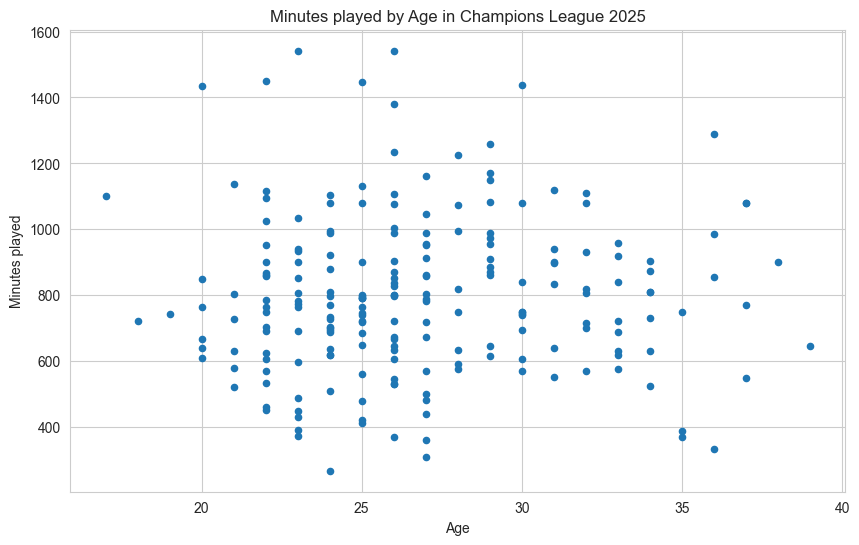

In [59]:
age_mins = ucl[['Player','Age','Minutes_played']]

age_mins.plot.scatter(x='Age',y='Minutes_played',figsize=(10,6))
plt.xlabel('Age')
plt.ylabel('Minutes played')
plt.title('Minutes played by Age in Champions League 2025')
plt.show()

#### Total Goals Scored in Champions League 2025

In [60]:
totals_goals_ucl25 = ucl.groupby('Team')['Goals'].sum().sort_values(ascending=False).sum()

print(f'Total Goals Scored in Champions League 2025: {totals_goals_ucl25}')

Total Goals Scored in Champions League 2025: 382


### Best Goaleeper in Champions League 2025

In [61]:
## Best Goalkeeper in Champions League based in Player,Team,Clean_Sheets,Saves
best_goalkeeper = ucl[ucl['Position'] == 'Goalkeeper'].sort_values(by='Saves', ascending=False).head(1)
best_goalkeeper[['Player','Position', 'Team', 'Clean_Sheets', 'Saves']]


,Player,Position,Team,Clean_Sheets,Saves
112,Yann Sommer,Goalkeeper,Inter,7,54


#### Strikers with 9 Jersey Number

In [62]:
strikers_9 = ucl[(ucl['Jersey_Num'] == 9) & (ucl['Goals'] > 0)]

In [63]:
strikers_9 = strikers_9[['Player', 'Team', 'Jersey_Num', 'Goals']].sort_values(by='Goals', ascending=False)

In [64]:
fig = px.bar(
    strikers_9,
    x='Player',
    y='Goals',
    color='Team',
    title='Players With Jersey Number 9 Who Scored Goals in Champions League 2025',
    text='Goals'
)

fig.show()

#### Sa Skuadra Kan Qene Unike ne Champions League 2025

In [65]:
len(ucl['Team'].unique())

31

In [66]:
ucl['Team'].value_counts().reset_index(name='players_num')

,Team,players_num
0,Inter,13
1,Barcelona,12
2,Arsenal FC,12
3,Paris SG,12
4,Real Madrid,11
5,BVB Dortmund,11
6,PSV Eindhoven,10
7,Bayern Munich,10
8,Liverpool FC,10
9,Benfica,9


#### Scatter Plot Sa Pasime kan qene te kompletuar dhe sa kan qene Shanse te krijuara

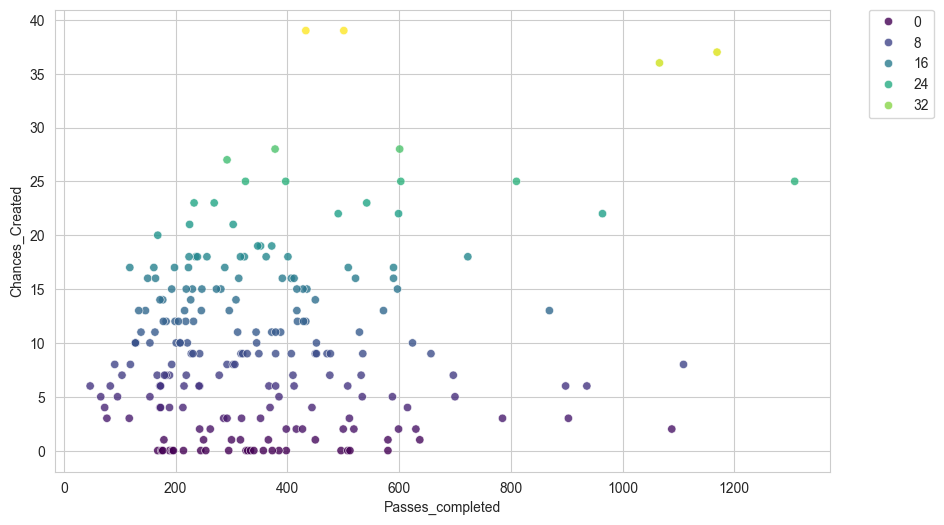

In [71]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=ucl,x='Passes_completed',y='Chances_Created',hue='Chances_Created',alpha=0.8, palette='viridis')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Dummies Data - per te shikuar Skuadren dhe lojtaret qe jane na jene finalist ne Champions League

In [72]:
ucl_dummies =  pd.get_dummies(ucl, columns=['Phase','Phase_Tier'])

In [74]:
ucl_dummies['Phase_Final'].value_counts()

Phase_Final
False    185
True      25
Name: count, dtype: int64

In [76]:
ucl_dummies['Phase_Final'].value_counts()

Phase_Final
False    185
True      25
Name: count, dtype: int64

In [77]:
ucl_final = ucl_dummies[ucl_dummies['Phase_Final']== 1 ]

In [78]:
finalist_teams = ucl_final['Team'].value_counts()

In [79]:
finalist_teams.rename('Players Number')

Team
Inter       13
Paris SG    12
Name: Players Number, dtype: int64

In [81]:
ucl_league = ucl_dummies[ucl_dummies['Phase_League_phase'] == 1]
league_teams = ucl_league['Team'].value_counts()
print(league_teams.rename('Players Number'))
print(league_teams.rename('Players Number').sum())

Team
Bologna             4
Shakhtar Donetsk    3
VfB Stuttgart       2
Sturm Graz          1
Leipzig             1
Dinamo Zagreb       1
Girona              1
Name: Players Number, dtype: int64
13


#### Gjetja e Skuadra si Liverpool FC dhe Psv Eindhoven dhe shfaqja e Value10^6

In [83]:
liverpoolfc = ucl.loc[ucl['Team'] == 'Liverpool FC']

In [84]:
liverpoolfc[['Player','Team','Age','Value10^6']].sort_values(by='Value10^6',ascending=False)

,Player,Team,Age,Value10^6
194,Luis Diaz,Liverpool FC,28,85.0
31,Szoboszlai,Liverpool FC,24,80.0
174,Mac Allister,Liverpool FC,26,70.0
73,Gakpo,Liverpool FC,26,70.0
195,Ibrahima Konate,Liverpool FC,25,60.0
130,Salah,Liverpool FC,32,55.0
4,Van Dijk,Liverpool FC,33,50.0
52,Alisson Becker,Liverpool FC,32,35.0
199,Gravenberch,Liverpool FC,22,30.0
152,Robertson,Liverpool FC,31,20.0


In [85]:
psv = ucl.loc[ucl['Team'] == 'PSV Eindhoven']

In [86]:
psv[['Player','Team','Age','Value10^6']].sort_values(by='Value10^6',ascending=False)

,Player,Team,Age,Value10^6
13,Johan Bakayoko,PSV Eindhoven,22,35.0
155,Tillman,PSV Eindhoven,22,30.0
22,Joey Veerman,PSV Eindhoven,26,28.0
34,Noa Lang,PSV Eindhoven,25,25.0
168,Boscagli,PSV Eindhoven,27,23.0
123,Ismael Saibari,PSV Eindhoven,24,23.0
43,Ryan Flamingo,PSV Eindhoven,22,16.0
35,Mauro Junior,PSV Eindhoven,26,12.0
137,Luuk de Jong,PSV Eindhoven,34,3.0
200,Ivan Perisic,PSV Eindhoven,36,1.0


#### Distanca e pershkuar (ne km) nga Lojtaret ne Champions League
##### Kjo tregon sa kilometra ka vrapuar nje lojtar gjate gjith sezonit.
##### perdoret per te matur angazhimin fizik dhe levizshmerinë e lojtarit në fushe.

In [114]:
distancecovered_player = ucl.loc[ucl['DistanceCovered(km)'] > 90]

In [115]:
top_km = distancecovered_player[['Player','Age','Team','Goals','Assists','DistanceCovered(km)','Total_attempts','Chances_Created','Dribbles','Match_played']].sort_values(by='DistanceCovered(km)',ascending=False).head(20)

In [117]:
fig = px.bar(
    top_km,
    x='Player',
    y='DistanceCovered(km)',
    color='DistanceCovered(km)',
    title='"Distance covered by the player (in km) throughout the whole Season"',
    text='DistanceCovered(km)',
    hover_data=['Age', 'Team','Match_played'],
    hover_name='Team'
)
fig.show()

#### Number of Spain Players in Champions League Teams

In [118]:
ucl_spain = ucl[ucl['Nationality'] == 'Spain']

In [129]:
ucl_spain_players = ucl[ucl['Nationality'] == 'Spain'][['Player', 'Team', 'Competitions']].reset_index(drop=True)
ucl_spain_players


,Player,Team,Competitions
0,Yamal,Barcelona,La Liga
1,Fabian Ruiz,Paris SG,Ligue 1
2,Raul Asencio,Real Madrid,La Liga
3,Grimaldo,Bayer Leverkusen,Bundesliga
4,Pedri,Barcelona,La Liga
5,David Raya,Arsenal FC,Premier League
6,Inigo Martinez,Barcelona,La Liga
7,Dani Olmo,Barcelona,La Liga
8,Alvaro Carreras,Benfica,Liga Portugal
9,Mikel Merino,Arsenal FC,Premier League


In [132]:
grouped_spain = ucl_spain.groupby(['Team', 'Competitions'])['Player'].count().reset_index()
grouped_spain = grouped_spain.rename(columns={'Player': 'Num_Spanish_Players'})

In [156]:
fig = px.bar(
    grouped_spain,
    x='Team',
    y='Num_Spanish_Players',
    color='Competitions',
    text='Num_Spanish_Players',
    title='Number of Spain Players in Champions League Teams',
)
fig.show()

#### Number of France Players in Champions League Teams

In [145]:
ucl_france = ucl[ucl['Nationality'] == 'France']

In [146]:
ucl_france_players = ucl[ucl['Nationality'] == 'France'][['Player', 'Team', 'Competitions']].reset_index(drop=True)
ucl_france_players

,Player,Team,Competitions
0,Theo Hernandez,Milan,Serie A
1,Chevalier,Lille,Ligue 1
2,Kylian Mbappe,Real Madrid,La Liga
3,Kounde,Barcelona,La Liga
4,Mike Maignan,Milan,Serie A
5,Griezmann,Atletico Madrid,La Liga
6,Saliba,Arsenal FC,Premier League
7,Pavard,Inter,Serie A
8,Dembele,Paris SG,Ligue 1
9,Barcola,Paris SG,Ligue 1


In [157]:
grouped_france = ucl_france.groupby(['Team', 'Competitions'])['Player'].count().reset_index()
grouped_france = grouped_france.rename(columns={'Player': 'Num_French_Players'})

In [158]:
fig = px.bar(
    grouped_france,
    x='Team',
    y='Num_French_Players',
    color='Competitions',
    text='Num_French_Players',
    title='Number of France Players in Champions League Teams',
)
fig.show()

#### Number of Portuguese Players in Champions League Teams

In [159]:
ucl_portugal = ucl[ucl['Nationality'] == 'Portugal']

In [165]:
grouped_portugal = ucl_portugal.groupby(['Team', 'Competitions'])['Player'].count().reset_index()
grouped_portugal = grouped_portugal.rename(columns={'Player': 'Num_Portuguese_Players'})


In [163]:
fig = px.bar(
    grouped_portugal,
    x='Team',
    y='Num_Portuguese_Players',
    color='Competitions',
    text='Num_Portuguese_Players',
    title='Number of Portuguese Players in Champions League Teams',
)
fig.show()

### Descriptive & Statistics complete✅